In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import datasets

In [4]:
mnist = datasets.fetch_mldata('MNIST original')

In [5]:
features = mnist.data 
target = mnist.target

In [6]:
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, precision_recall_curve,confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
feat_train, FEAT_TEST, target_train, TARGET_TEST = train_test_split(features, target, test_size = 0.15, random_state = 42)

In [7]:
from sklearn.linear_model import SGDClassifier

In [8]:
sgd = SGDClassifier(random_state= 42)
training_error_sgd = cross_val_score(sgd,feat_train, target_train,  cv = 3)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

In [9]:
target_train_pred_sgd = cross_val_predict(sgd, feat_train, target_train, cv = 3)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

In [10]:
accuracy_train_sgd = np.diag(confusion_matrix( target_train,target_train_pred_sgd)).sum() / len(target_train)

In [11]:
accuracy_train_sgd

0.8558655462184874

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
RF = RandomForestClassifier(random_state= 42)
training_error_RF = cross_val_score(RF,feat_train, target_train,  cv = 3)

In [14]:
target_train_pred_RF = cross_val_predict(RF, feat_train, target_train, cv = 3)
accuracy_train_RF = np.diag(confusion_matrix(target_train,target_train_pred_RF)).sum() / len(target_train)
accuracy_train_RF

In [ ]:
training_error_RF = cross_val_score(RF,feat_train, target_train,  cv = 3)

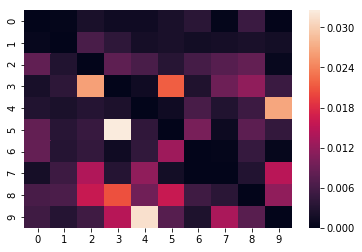

In [63]:
cf = confusion_matrix(target_train, target_train_pred_RF)
class_size = cf.sum(axis = 1)
np.fill_diagonal(cf  , 0)
sns.heatmap(cf / class_size)

In [34]:
RF_model = RF.fit(feat_train , target_train)
target_test_pred_RF = RF_model.predict(FEAT_TEST)
confusion_matrix(TARGET_TEST, target_test_pred_RF)
accuracy_test_RF = np.diag(confusion_matrix(TARGET_TEST, target_test_pred_RF)).sum() / len(TARGET_TEST)
accuracy_test_RF

0.9501904761904761

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
KN = KNeighborsClassifier()
model = KN.fit(feat_train, target_train)
target_test_pred = model.predict(FEAT_TEST)

In [22]:
accuracy_test_KN = np.diag(confusion_matrix(TARGET_TEST,target_test_pred)).sum() / len(TARGET_TEST)a

In [23]:
accuracy_test_KN

0.9721904761904762

In [42]:
from sklearn.preprocessing import StandardScaler,MaxAbsScaler

In [35]:
from sklearn.pipeline import Pipeline

In [39]:
pipe = Pipeline([
                ('SS', StandardScaler()),
                ('RF_2',RandomForestClassifier(random_state= 42))
                ])
RF_model_2 = pipe.fit(feat_train , target_train)
target_test_pred_RF_2 = RF_model_2.predict(FEAT_TEST)
accuracy_test_RF_2 = np.diag(confusion_matrix(TARGET_TEST, target_test_pred_RF_2)).sum() / len(TARGET_TEST)
accuracy_test_RF_2

In [45]:
pipe_2 = Pipeline([
                ('Scaler', MaxAbsScaler()),
                ('RF_3',RandomForestClassifier(random_state= 42))
                ])
RF_model_3 = pipe_2.fit(feat_train , target_train)
target_test_pred_RF_3 = RF_model_3.predict(FEAT_TEST)
accuracy_test_RF_3 = np.diag(confusion_matrix(TARGET_TEST, target_test_pred_RF_3)).sum() / len(TARGET_TEST)
accuracy_test_RF_3

0.9501904761904761

In [9]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    'random_state':[42]
}

In [12]:
GridCV = GridSearchCV(RandomForestClassifier(), param_grid= param_grid)
GridCV.fit(feat_train , target_train)

KeyboardInterrupt: 